<a href="https://colab.research.google.com/github/r-sanjiv/driver_drowsiness_detection/blob/main/driver_drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


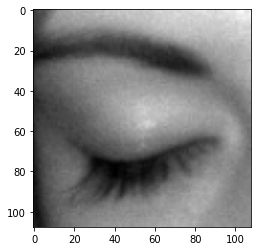

In [3]:
Datadirectory = '/content/gdrive/MyDrive/train_data'
Classes = ['Closed_Eyes', 'Open_Eyes']


for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

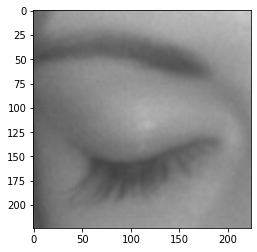

In [4]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass

In [6]:
create_training_data()
print(len(training_data))

4025


In [7]:
import random
random.shuffle(training_data)

In [8]:
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X.shape

(4025, 224, 224, 3)

In [9]:
X = X/255.0
Y = np.array(y)

In [10]:
model = tf.keras.applications.mobilenet.MobileNet()

In [11]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [12]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)

In [13]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [14]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [15]:
history = new_model.fit(X,Y, epochs = 5, validation_split = 0.1)

Epoch 1/5
114/114 [==============================] - 36s 216ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0954 - val_accuracy: 0.9727
Epoch 2/5
114/114 [==============================] - 23s 200ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/5
114/114 [==============================] - 22s 197ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 2.7021e-08 - val_accuracy: 1.0000
Epoch 4/5
114/114 [==============================] - 22s 197ms/step - loss: 2.5689e-04 - accuracy: 1.0000 - val_loss: 5.7586e-04 - val_accuracy: 1.0000
Epoch 5/5
114/114 [==============================] - 23s 198ms/step - loss: 9.1850e-05 - accuracy: 1.0000 - val_loss: 1.9975e-04 - val_accuracy: 1.0000


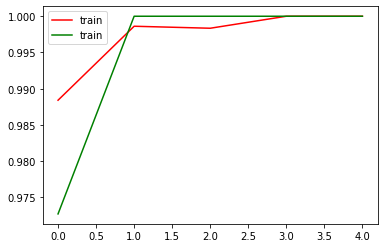

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='train')
plt.legend()
plt.show()

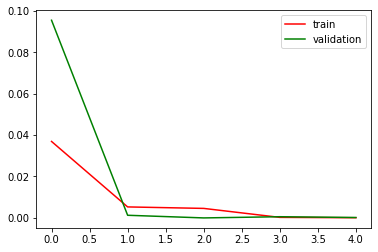

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [18]:
new_model.save('my_model.h5')
new_model = tf.keras.models.load_model('my_model.h5')

In [19]:
img_array = cv2.imread('/content/gdrive/MyDrive/Data/train/Closed/_101.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [20]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
X_input.shape

(1, 224, 224, 3)

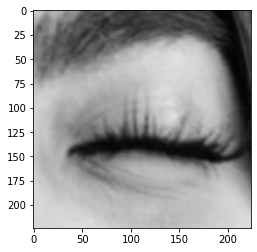

In [21]:
plt.imshow(new_array)

In [22]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

1/1 [==============================] - 1s 619ms/step


array([[6.336408e-07]], dtype=float32)

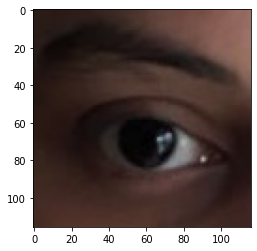

In [23]:
img = cv2.imread('/content/gdrive/MyDrive/Data/train/Open/_356.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [24]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/gdrive/MyDrive/train_data/haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/gdrive/MyDrive/train_data/haarcascade_eye.xml')

In [25]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

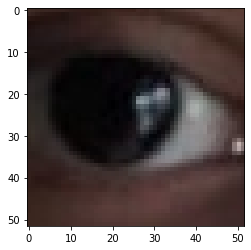

In [26]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [27]:
eyes_roi.shape

(52, 52, 3)

In [28]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

new_model.predict(final_img)

1/1 [==============================] - 0s 17ms/step


array([[0.6754982]], dtype=float32)